# Imports MUST RUN

In [28]:
#---------Imports---------
import matplotlib.pyplot as plt
import pandas as pd
import re
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from numpy.ma.core import concatenate
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from numpy.ma.core import concatenate
from itertools import cycle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import string
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing

In [29]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if (i not in string.punctuation)])
    return punctuationfree

def add_prefix_NOT_(text):
  neg_array = ["n’t","n't", "not", "no", "never"]
  final_txt = ""
  flg = 0;
  for i in text.split():
    if flg == 1:
      final_txt = final_txt + " NOT_" + i
    else:
      final_txt = final_txt + " " + i
    if i.endswith(tuple(neg_array)):
      flg = 1
    else:
      flg = 0
  return final_txt

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')
   
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def stem(text):
    return [stemmer.stem(word) for word in text]
def lem(text):
  return [lemmatizer.lemmatize(word) for word in text]
def split(text):
  return re.split(' ',text)
def stringify(text):
  return ' '.join(text)

# Read & download glove MUST RUN

In [2]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-12-23 10:05:47--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-23 10:05:47--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 41s  

2021-12-23 10:08:28 (5.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: 

# CountVectorizer with Adam optimizer and L1 loss

1000
15976
Net(
  (lin3): Linear(in_features=1000, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.3932187393903732 Validation loss = 0.3514074327217208
Training F1_score = 0.5779091157999857 Validation F1_score = 0.6159275980274869
Epoch 1:
Training loss = 0.3215887520313263 Validation loss = 0.30520787090063095
Training F1_score = 0.6199947275319542 Validation F1_score = 0.6332533234110032
Epoch 2:
Training loss = 0.2867836743593216 Validation loss = 0.28096401401691967
Training F1_score = 0.6300308893184259 Validation F1_score = 0.6368605918980756
Epoch 3:
Training loss = 0.2672402973771095 Validation loss = 0.26682785691486466
Training F1_score = 0.6347982528924743 Validation F1_score = 0.6340321854542509
Epoch 4:
Training loss = 0.2546099057793617 Validation loss = 0.2569528677397304
Training F1_score = 0.6379036391949179 Validation F1_score = 0.6358513331975444
Epoch 5:
Training loss = 0.24608967673778534 Validation loss = 0.25006330013275146
Training F1_score = 0.6414103

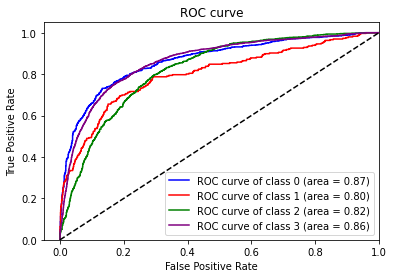

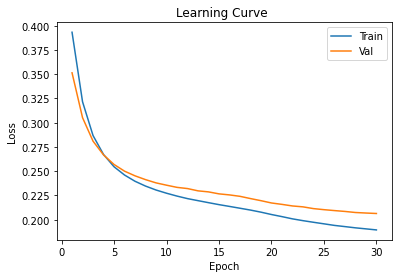

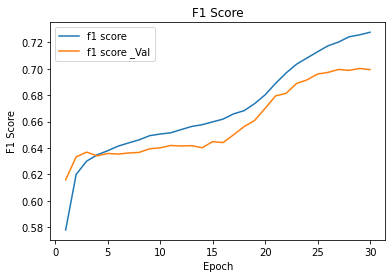

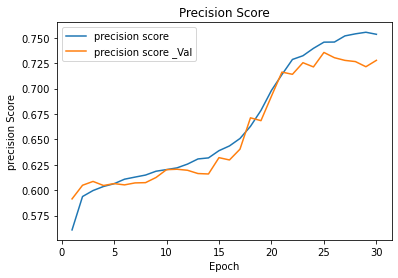

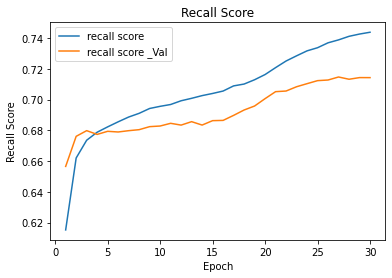

In [127]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin3 = nn.Linear(D_in, D_out)
    
    def forward(self, x):
        out = nn.functional.softmax(self.lin3(x),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# CountVectorizer with Adam optimizer L1 loss and 1 hidden layer

1000
15976
Net(
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.26214436516165734 Validation loss = 0.21946973146663773
Training F1_score = 0.6187720751003439 Validation F1_score = 0.6344494217617587
Epoch 1:
Training loss = 0.20334518924355507 Validation loss = 0.2193533442914486
Training F1_score = 0.6547951505154177 Validation F1_score = 0.6315649462147894
Epoch 2:
Training loss = 0.19378115943074226 Validation loss = 0.215906815810336
Training F1_score = 0.6688107442901747 Validation F1_score = 0.6356285509925796
Epoch 3:
Training loss = 0.1842172003686428 Validation loss = 0.20415187730557388
Training F1_score = 0.6926886216623073 Validation F1_score = 0.6792952420805841
Epoch 4:
Training loss = 0.16990894946455956 Validation loss = 0.2015398210949368
Training F1_score = 0.733314806699863 Validation F1_score = 0.6914207871552565
Epoch 5:
Training loss = 0.1596671416759491 Vali

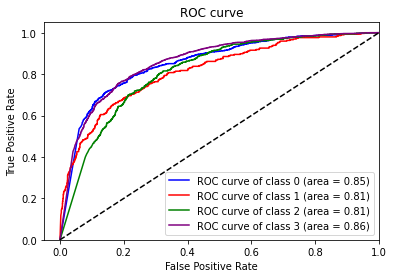

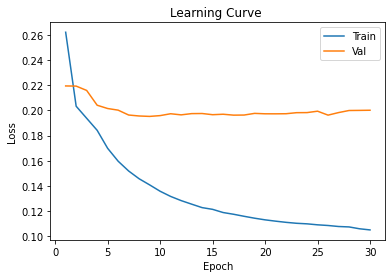

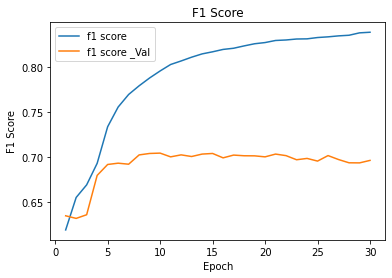

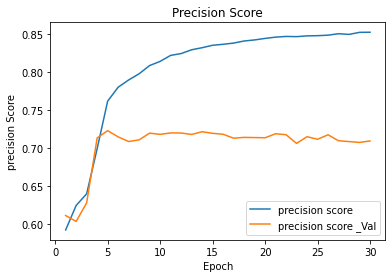

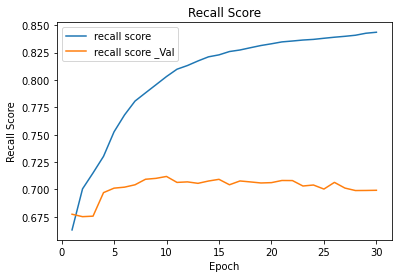

In [129]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin2 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin2(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# CountVectorizer with MSE loss

1000
15976
Net(
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.14781299039721488 Validation loss = 0.12998298907445538
Training F1_score = 0.6377814483657733 Validation F1_score = 0.7083779601171867
Epoch 1:
Training loss = 0.1187496654689312 Validation loss = 0.1282261556221379
Training F1_score = 0.7358113279016685 Validation F1_score = 0.7070797158757202
Epoch 2:
Training loss = 0.10681716963648796 Validation loss = 0.12720882333815098
Training F1_score = 0.7721952886477879 Validation F1_score = 0.715212086332208
Epoch 3:
Training loss = 0.09518465478718281 Validation loss = 0.12994213298790985
Training F1_score = 0.8075374620430318 Validation F1_score = 0.7099178332027208
Epoch 4:
Training loss = 0.08245292757451535 Validation loss = 0.13224701624777582
Training F1_score = 0.83959173195131 Validation F1_score = 0.710474484688695
Epoch 5:
Training loss = 0.06976089005172252 Val

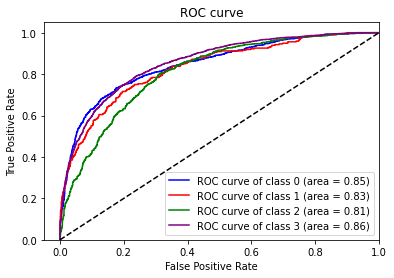

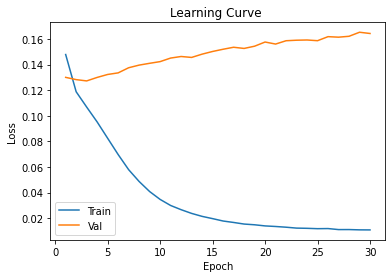

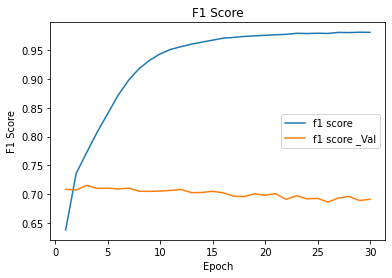

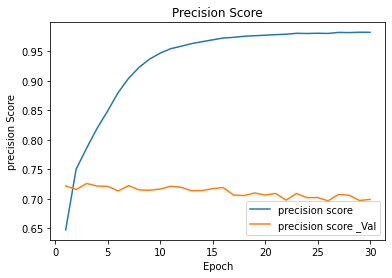

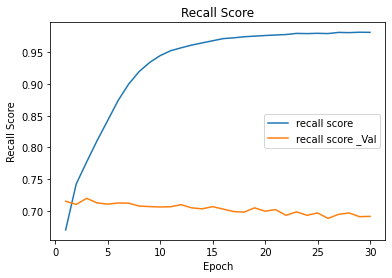

In [130]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin2 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin2(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# CountVectorizer with cross entropy loss

1000
15976
Net(
  (lin1): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 1.103239098072052 Validation loss = 1.1021473738882277
Training F1_score = 0.2397299535062983 Validation F1_score = 0.23660135978420416
Epoch 1:
Training loss = 1.1009406962394714 Validation loss = 1.0999609265062544
Training F1_score = 0.23747586935867707 Validation F1_score = 0.23737822602579442
Epoch 2:
Training loss = 1.0987195782661439 Validation loss = 1.0978114042017195
Training F1_score = 0.2366628906632704 Validation F1_score = 0.23557632062169084
Epoch 3:
Training loss = 1.0965570058822631 Validation loss = 1.0956663091977437
Training F1_score = 0.2354442624727869 Validation F1_score = 0.23619415027670915
Epoch 4:
Training loss = 1.094420316696167 Validation loss = 1.0936094489362505
Training F1_score = 0.23584177085444513 Validation F1_score = 0.23340814210914196
Epoch 5:
Training loss = 1.0923439054489135 Val

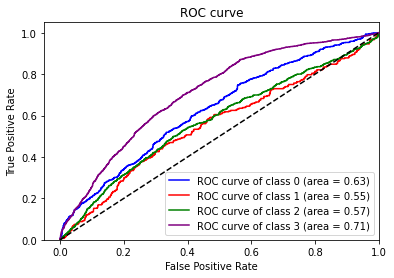

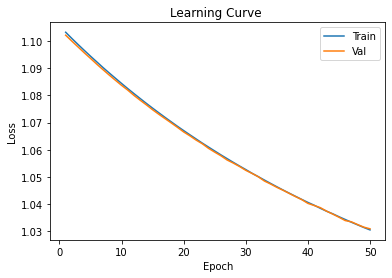

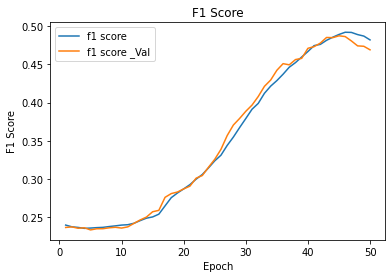

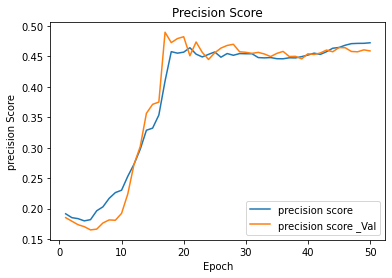

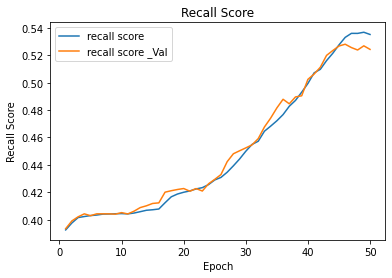

In [138]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')


#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])


Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)

        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))

        out = self.lin3(out)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    scores = nn.functional.softmax(y_pred, dim=1)

    scores = scores.detach().numpy()

    output = []
    for score in scores:
      k = np.where(score == score.max())
      output.append(np.array(k[0].item()))

    output = np.array(output)
    f1 = f1_score(y_batch.detach().numpy(),output,average='weighted')
    batch_f1.append(f1)
    precision = precision_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    batch_pre.append(precision)
    recall = recall_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    batch_rec.append(recall)

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    # Score
    scores = nn.functional.softmax(y_pred, dim=1)

    scores = scores.detach().numpy()

    output = []
    for score in scores:
      k = np.where(score == score.max())
      output.append(np.array(k[0].item()))

    output = np.array(output)
    f1 = f1_score(y_batch.detach().numpy(),output,average='weighted')
    val_batch_f1.append(f1)
    precision = precision_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)
    recall = recall_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)

  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# SGD cross entropy with lr 0.01

1000
15976
Net(
  (lin1): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 1.0358940243721009 Validation loss = 0.9992520560820898
Training F1_score = 0.3112816437883014 Validation F1_score = 0.3008251648477704
Epoch 1:
Training loss = 0.982129361629486 Validation loss = 0.96978992720445
Training F1_score = 0.30166687146282534 Validation F1_score = 0.3103447487310208
Epoch 2:
Training loss = 0.9576184339523316 Validation loss = 0.9480044891436895
Training F1_score = 0.37016412143114574 Validation F1_score = 0.4456026047412613
Epoch 3:
Training loss = 0.9343116714954376 Validation loss = 0.9232136938307021
Training F1_score = 0.5057812241338019 Validation F1_score = 0.5564878304304147
Epoch 4:
Training loss = 0.9083528106212616 Validation loss = 0.8975434237056308
Training F1_score = 0.5699893965140505 Validation F1_score = 0.5768157971365276
Epoch 5:
Training loss = 0.8807301502227783 Validatio

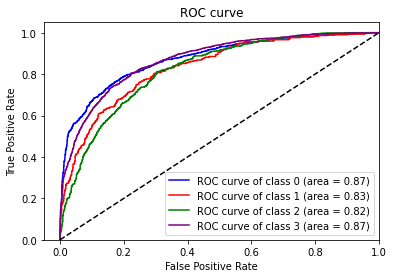

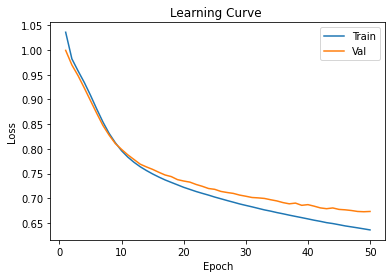

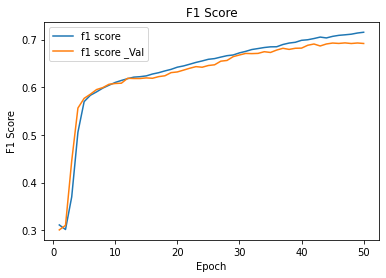

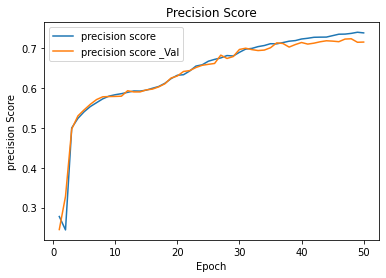

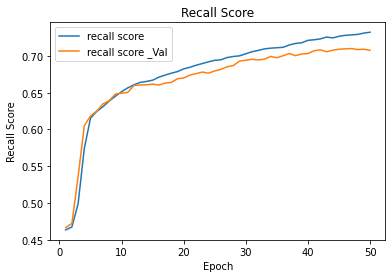

In [139]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')


#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])


Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)

        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))

        out = self.lin3(out)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.01

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    scores = nn.functional.softmax(y_pred, dim=1)

    scores = scores.detach().numpy()

    output = []
    for score in scores:
      k = np.where(score == score.max())
      output.append(np.array(k[0].item()))

    output = np.array(output)
    f1 = f1_score(y_batch.detach().numpy(),output,average='weighted')
    batch_f1.append(f1)
    precision = precision_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    batch_pre.append(precision)
    recall = recall_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    batch_rec.append(recall)

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    # Score
    scores = nn.functional.softmax(y_pred, dim=1)

    scores = scores.detach().numpy()

    output = []
    for score in scores:
      k = np.where(score == score.max())
      output.append(np.array(k[0].item()))

    output = np.array(output)
    f1 = f1_score(y_batch.detach().numpy(),output,average='weighted')
    val_batch_f1.append(f1)
    precision = precision_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)
    recall = recall_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)

  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# SGD with cross entropy and lr 0.1

1000
15976
Net(
  (lin1): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.8975909669399261 Validation loss = 0.799256831407547
Training F1_score = 0.5198819478451754 Validation F1_score = 0.6033736319738434
Epoch 1:
Training loss = 0.7549020807743072 Validation loss = 0.7389134582546022
Training F1_score = 0.6225802831872018 Validation F1_score = 0.636175883992744
Epoch 2:
Training loss = 0.7097832834720612 Validation loss = 0.7064959266119533
Training F1_score = 0.6534281036729314 Validation F1_score = 0.6689460413917664
Epoch 3:
Training loss = 0.6820337135791779 Validation loss = 0.6912523690197203
Training F1_score = 0.6800256612082063 Validation F1_score = 0.6863707458005082
Epoch 4:
Training loss = 0.6597055356502532 Validation loss = 0.6755745940738254
Training F1_score = 0.6967374180003535 Validation F1_score = 0.6989177057668923
Epoch 5:
Training loss = 0.6409556612968444 Validation

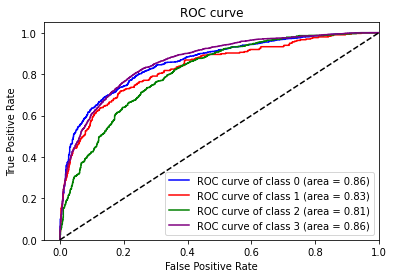

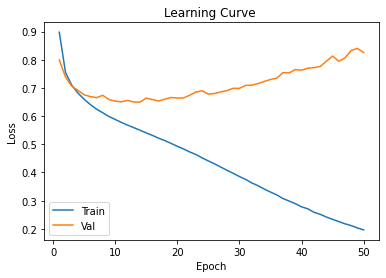

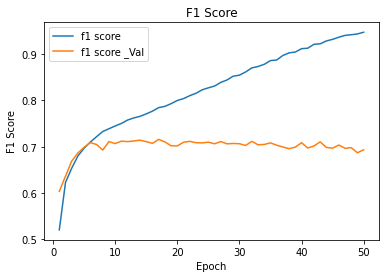

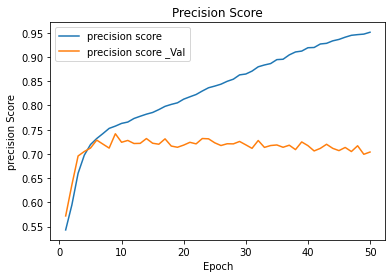

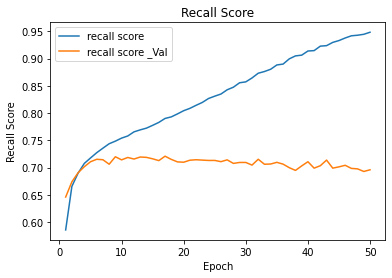

In [140]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')


#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])


Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)

        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))

        out = self.lin3(out)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.1

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    scores = nn.functional.softmax(y_pred, dim=1)

    scores = scores.detach().numpy()

    output = []
    for score in scores:
      k = np.where(score == score.max())
      output.append(np.array(k[0].item()))

    output = np.array(output)
    f1 = f1_score(y_batch.detach().numpy(),output,average='weighted')
    batch_f1.append(f1)
    precision = precision_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    batch_pre.append(precision)
    recall = recall_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    batch_rec.append(recall)

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    # Score
    scores = nn.functional.softmax(y_pred, dim=1)

    scores = scores.detach().numpy()

    output = []
    for score in scores:
      k = np.where(score == score.max())
      output.append(np.array(k[0].item()))

    output = np.array(output)
    f1 = f1_score(y_batch.detach().numpy(),output,average='weighted')
    val_batch_f1.append(f1)
    precision = precision_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)
    recall = recall_score(y_batch.detach().numpy(),output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)

  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# SGD with MSE

1000
15976
Net(
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.22389733928442002 Validation loss = 0.22329739191465908
Training F1_score = 0.1309139217826386 Validation F1_score = 0.20204399642275836
Epoch 1:
Training loss = 0.22275718134641648 Validation loss = 0.22218436540828812
Training F1_score = 0.26197559165339174 Validation F1_score = 0.3223577838609578
Epoch 2:
Training loss = 0.2216844179034233 Validation loss = 0.22114575861228836
Training F1_score = 0.3311275896691662 Validation F1_score = 0.33560675321422473
Epoch 3:
Training loss = 0.22067474955320357 Validation loss = 0.22017310683925947
Training F1_score = 0.3327436898020244 Validation F1_score = 0.32908425017593984
Epoch 4:
Training loss = 0.2197177048921585 Validation loss = 0.21922456721464792
Training F1_score = 0.3244985520691708 Validation F1_score = 0.3241334145262641
Epoch 5:
Training loss = 0.2188143514990

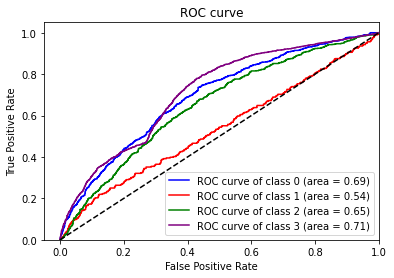

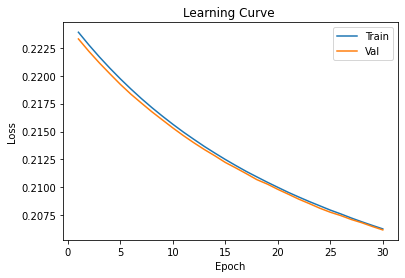

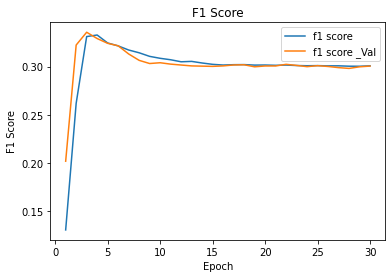

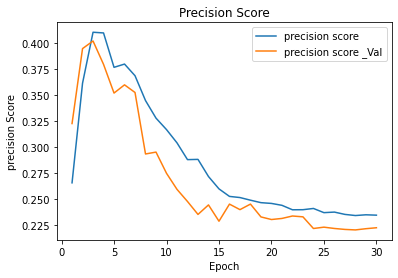

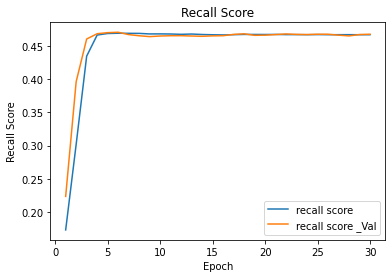

In [141]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin2 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin2(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# SGD with momentum and MSE

1000
15976
Net(
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.21647855538129807 Validation loss = 0.21285798110895687
Training F1_score = 0.39945624578723443 Validation F1_score = 0.40209774571303836
Epoch 1:
Training loss = 0.21028199464082717 Validation loss = 0.20799038890335295
Training F1_score = 0.35744632319128294 Validation F1_score = 0.3170351840940211
Epoch 2:
Training loss = 0.20623660790920256 Validation loss = 0.2047099620103836
Training F1_score = 0.3143148717864615 Validation F1_score = 0.3028193687552521
Epoch 3:
Training loss = 0.2033625522851944 Validation loss = 0.20219308510422707
Training F1_score = 0.3053998871599916 Validation F1_score = 0.30413070618391486
Epoch 4:
Training loss = 0.20117259037494659 Validation loss = 0.2002627555694845
Training F1_score = 0.30585845426334635 Validation F1_score = 0.30641222109567107
Epoch 5:
Training loss = 0.199288575172

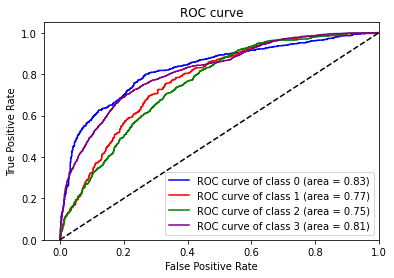

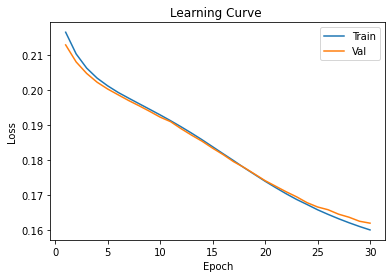

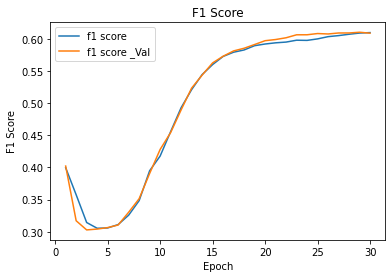

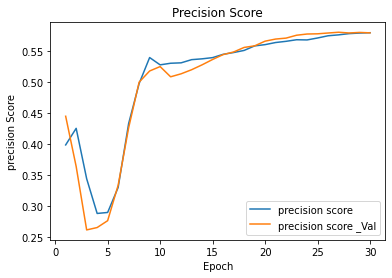

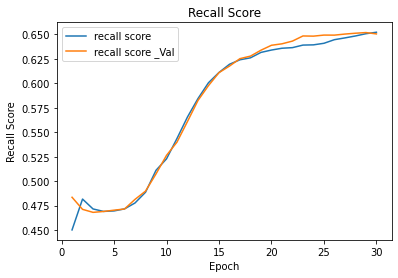

In [142]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin2 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin2(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# SGD MSE and batch sizes

1000
15976
Net(
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.21995349943637849 Validation loss = 0.21751507620016733
Training F1_score = 0.3327305776887793 Validation F1_score = 0.3190884349419296
Epoch 1:
Training loss = 0.21554580760002137 Validation loss = 0.2137061001525985
Training F1_score = 0.3126724057680659 Validation F1_score = 0.30389719164589857
Epoch 2:
Training loss = 0.212157799243927 Validation loss = 0.21069780985514322
Training F1_score = 0.304685625959803 Validation F1_score = 0.30414991569673167
Epoch 3:
Training loss = 0.2094943300485611 Validation loss = 0.20840125613742405
Training F1_score = 0.30127905808797284 Validation F1_score = 0.30303529171101984
Epoch 4:
Training loss = 0.20734135341644286 Validation loss = 0.20645803792609108
Training F1_score = 0.3010015430960783 Validation F1_score = 0.3037021428203505
Epoch 5:
Training loss = 0.2055969378948211

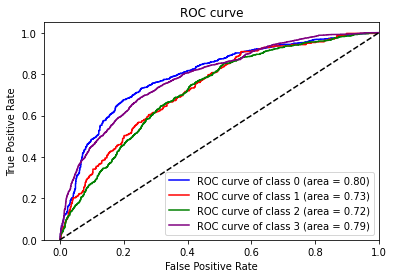

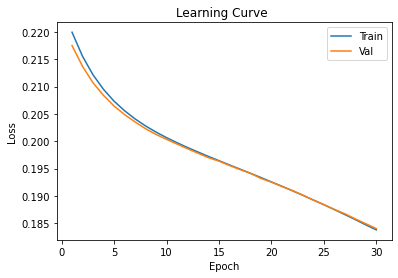

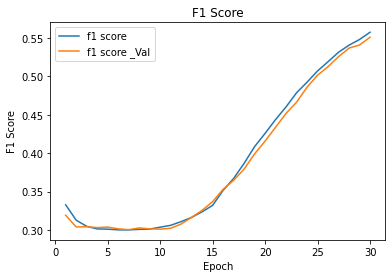

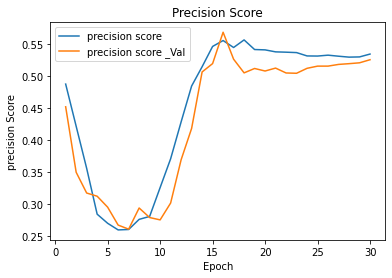

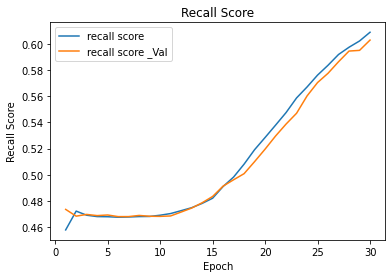

In [143]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = CountVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin2 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin2(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=128, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# TFIDF vectorizer

1000
15976
Net(
  (lin2): Linear(in_features=1000, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.2202616464495659 Validation loss = 0.21649088834722838
Training F1_score = 0.2586175907162224 Validation F1_score = 0.29985151218619643
Epoch 1:
Training loss = 0.21373471057415008 Validation loss = 0.21152415581875378
Training F1_score = 0.2997647618283425 Validation F1_score = 0.2989970143385938
Epoch 2:
Training loss = 0.20973584496974945 Validation loss = 0.20820173165864414
Training F1_score = 0.29921976412636464 Validation F1_score = 0.29924283628402715
Epoch 3:
Training loss = 0.207147574365139 Validation loss = 0.20628378788630167
Training F1_score = 0.2994837102222958 Validation F1_score = 0.30012053218741763
Epoch 4:
Training loss = 0.2054266448020935 Validation loss = 0.20475638409455618
Training F1_score = 0.30009783241279203 Validation F1_score = 0.29986394019662554
Epoch 5:
Training loss = 0.2041889944672

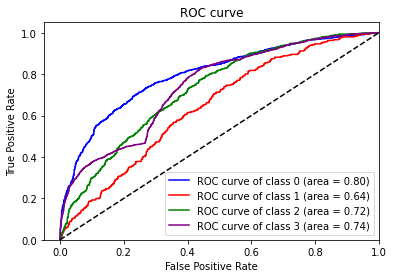

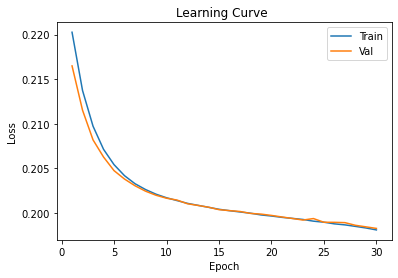

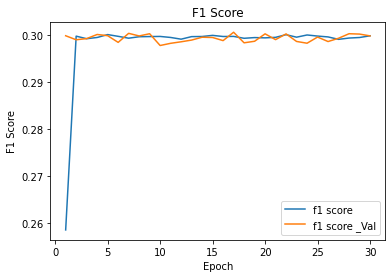

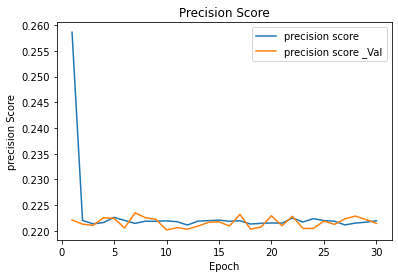

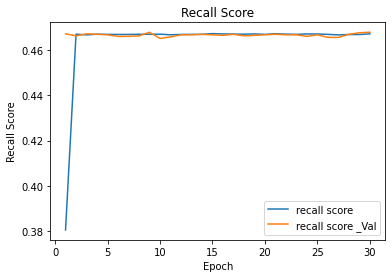

In [144]:

df = pd.read_csv('/content/vaccine_train_set.csv')
df_val = pd.read_csv('/content/vaccine_validation_set.csv')

#-------Vectorizer-------
vectorizer = TfidfVectorizer(stop_words = "english",max_features = 1000)
X = vectorizer.fit_transform(df['tweet'])
X_val = vectorizer.transform(df_val['tweet'])

Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(X.toarray(),dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(X_val.toarray(),dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin2 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin2(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)
        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

learning_rate = 0.001

model = Net(D_in, H1,H2,H3, D_out)
print(model)

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  for x_batch, y_batch in dataloader_Val:
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())


    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)

    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader))
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val))

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)

for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# Glove 50D

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.2331484140753746 Validation loss = 0.20312861974040666
Training F1_score = 0.41196748335015326 Validation F1_score = 0.4934010925894579
Epoch 1:
Training loss = 0.19951604449748994 Validation loss = 0.19686839191450012
Training F1_score = 0.502449574566897 Validation F1_score = 0.5079303935341848
Epoch 2:
Training loss = 0.19419032871723174 Validation loss = 0.1930319575799836
Training F1_score = 0.5198103090339358 Validation F1_score = 0.5283569238450454
Epoch 3:
Training loss = 0.19024189972877503 Validation loss = 0.18989245262410906
Training F1_score = 0.5357247642659183 Validation F1_score = 0.5338462568289367
Epoch 4:
Training loss = 0.18713062387704849 Validation loss = 0.1882442571222782
Training F1_score = 0.5467702006542311 Validation F1_score = 0.5429062088339998
Epoch 5:
Training loss = 0.18457731920480727 Vali

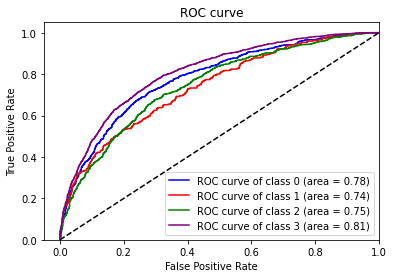

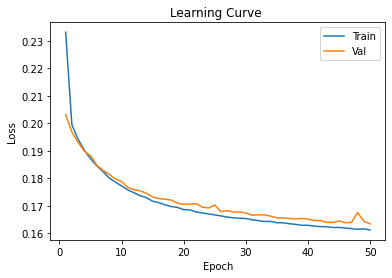

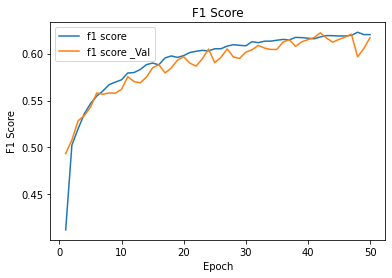

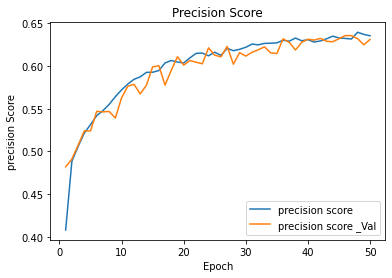

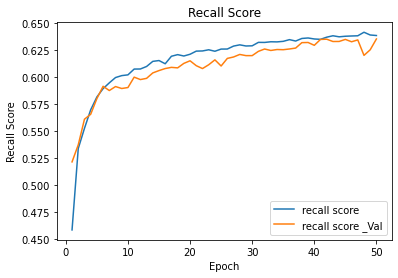

In [147]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# GloVe 300D

300
15976
Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.21337367111444475 Validation loss = 0.20736872280637422
Training F1_score = 0.3835730543645266 Validation F1_score = 0.4293233169755781
Epoch 1:
Training loss = 0.20192487758398056 Validation loss = 0.20023239569531548
Training F1_score = 0.46541290721745127 Validation F1_score = 0.48106678334941905
Epoch 2:
Training loss = 0.19583636689186096 Validation loss = 0.19587334907717174
Training F1_score = 0.5103265076464254 Validation F1_score = 0.5089853439098853
Epoch 3:
Training loss = 0.19158870112895965 Validation loss = 0.19188228622078896
Training F1_score = 0.5339272006800982 Validation F1_score = 0.5274922252572244
Epoch 4:
Training loss = 0.18828399628400802 Validation loss = 0.18940181533495584
Training F1_score = 0.5490291430951153 Validation F1_score = 0.54072165381818
Epoch 5:
Training loss = 0.18566158616542816

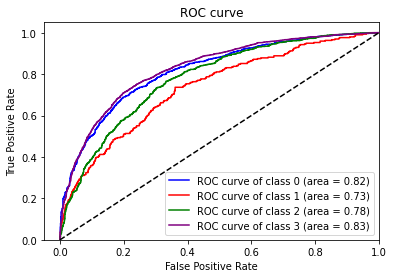

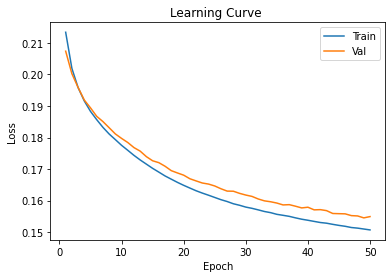

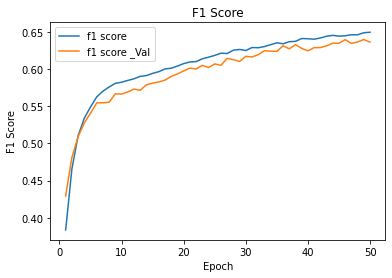

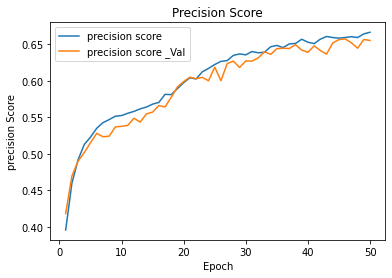

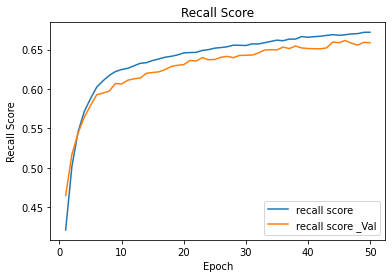

In [148]:
glove_to_pd = pd.read_csv('glove.6B.300d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,300])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# GloVe 200D

200
15976
Net(
  (lin1): Linear(in_features=200, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.21022700035572053 Validation loss = 0.20683687759770286
Training F1_score = 0.42717602463579835 Validation F1_score = 0.44765186287678005
Epoch 1:
Training loss = 0.19886467456817628 Validation loss = 0.1985742598772049
Training F1_score = 0.49738753791607526 Validation F1_score = 0.5027652131673495
Epoch 2:
Training loss = 0.1928213838338852 Validation loss = 0.19357698038220406
Training F1_score = 0.5303852429841663 Validation F1_score = 0.5244118233990392
Epoch 3:
Training loss = 0.18829479265213012 Validation loss = 0.18962069807781112
Training F1_score = 0.5481810474462457 Validation F1_score = 0.5428033411050112
Epoch 4:
Training loss = 0.18512332212924956 Validation loss = 0.18692365951008266
Training F1_score = 0.5581278199731525 Validation F1_score = 0.5535512127211218
Epoch 5:
Training loss = 0.182295162320137 

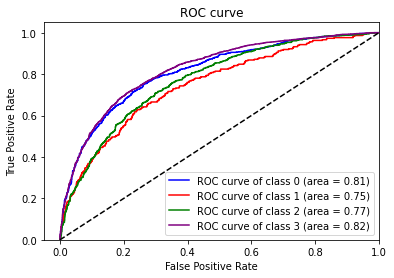

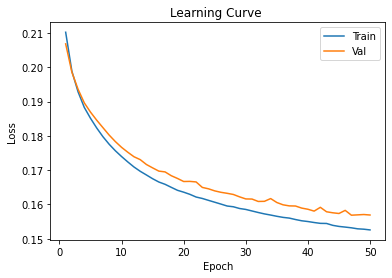

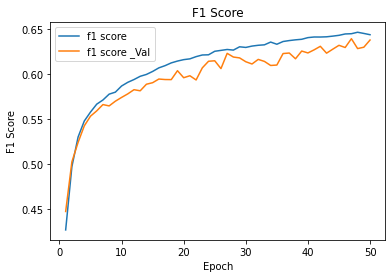

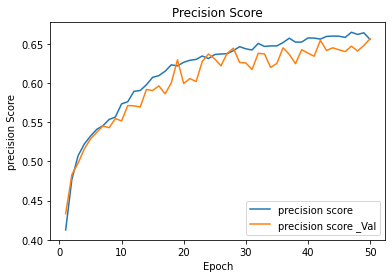

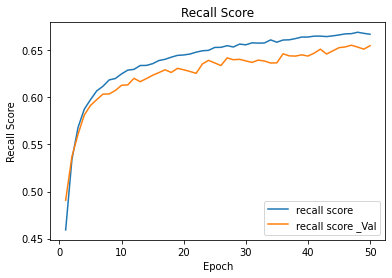

In [149]:
glove_to_pd = pd.read_csv('glove.6B.200d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,200]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,200])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# 2 hidden layers with 500 and 250 nodes

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=250, bias=True)
  (lin3): Linear(in_features=250, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.19089479583501817 Validation loss = 0.18391683532132042
Training F1_score = 0.5214349825892779 Validation F1_score = 0.5612086015933827
Epoch 1:
Training loss = 0.17632055062055588 Validation loss = 0.1729807804028193
Training F1_score = 0.5698248707139071 Validation F1_score = 0.583350487833568
Epoch 2:
Training loss = 0.1702111670076847 Validation loss = 0.17523404169413778
Training F1_score = 0.5888256757557827 Validation F1_score = 0.5653643270188919
Epoch 3:
Training loss = 0.16873660242557526 Validation loss = 0.16701555769476625
Training F1_score = 0.5974774298498304 Validation F1_score = 0.6112144479724255
Epoch 4:
Training loss = 0.16538165119290352 Validation loss = 0.16657154800163376
Training F1_score = 0.6062444757320536 Validation F1_score = 0.592

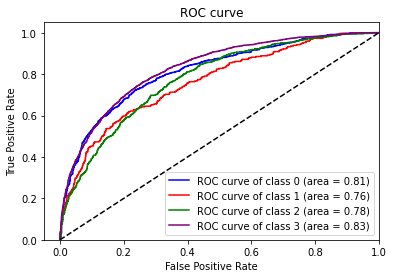

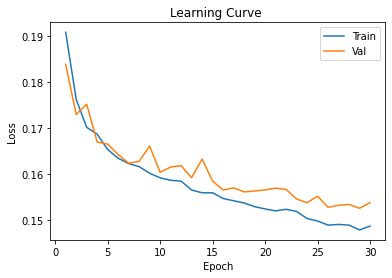

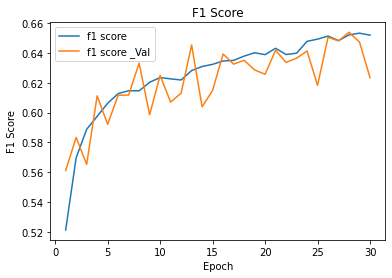

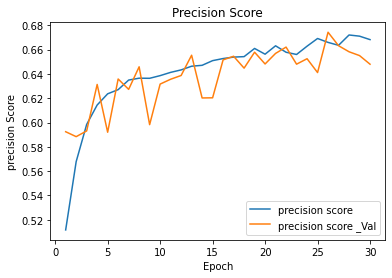

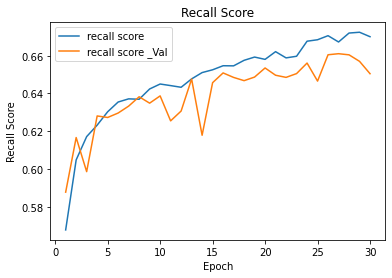

In [150]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, H2)
        self.lin3 = nn.Linear(H2, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.relu(self.lin2(out))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 500
H2 = 250
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# 2 hidden layers with 50 and 50 nodes

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.20612772881984712 Validation loss = 0.19862529097331894
Training F1_score = 0.4633608315201502 Validation F1_score = 0.49683628243273403
Epoch 1:
Training loss = 0.19367058539390564 Validation loss = 0.19184670762883294
Training F1_score = 0.5279011794488604 Validation F1_score = 0.5262891699369517
Epoch 2:
Training loss = 0.18920602905750275 Validation loss = 0.188237224602037
Training F1_score = 0.5441543521577372 Validation F1_score = 0.5377330413877528
Epoch 3:
Training loss = 0.18557791692018508 Validation loss = 0.1850931483010451
Training F1_score = 0.5523925827422665 Validation F1_score = 0.5454394325340314
Epoch 4:
Training loss = 0.18178881323337556 Validation loss = 0.18053880665037367
Training F1_score = 0.5582122413957412 Validation F1_score = 0.557061

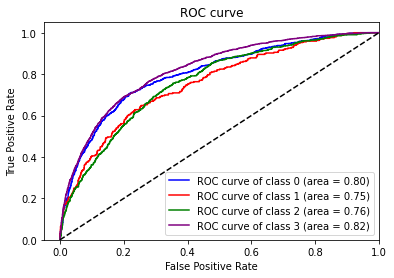

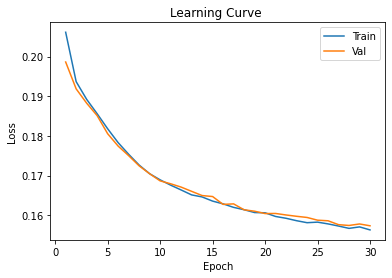

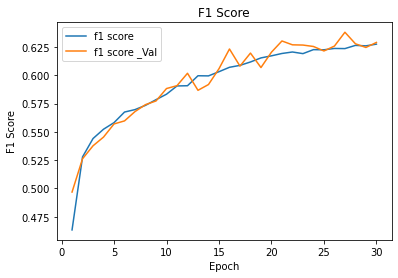

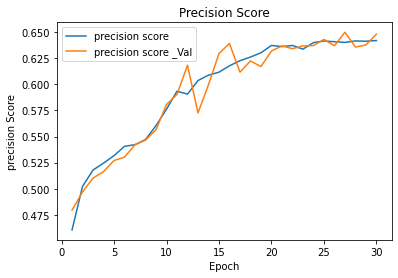

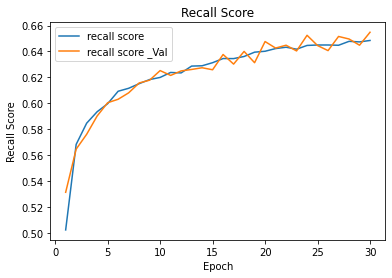

In [151]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, H2)
        self.lin3 = nn.Linear(H2, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.relu(self.lin2(out))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 50
H2 = 50
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# No hidden layers

50
15976
Net(
  (lin3): Linear(in_features=50, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.2615820979475975 Validation loss = 0.20737492334511545
Training F1_score = 0.42665405600072487 Validation F1_score = 0.5296561469984551
Epoch 1:
Training loss = 0.2046980783343315 Validation loss = 0.22476660625802147
Training F1_score = 0.5294233648555999 Validation F1_score = 0.47905461917707143
Epoch 2:
Training loss = 0.19622347325086595 Validation loss = 0.201672257648574
Training F1_score = 0.5370348646852039 Validation F1_score = 0.5163886874835082
Epoch 3:
Training loss = 0.1939223935008049 Validation loss = 0.1955521951119105
Training F1_score = 0.5439589174736873 Validation F1_score = 0.5312342677195888
Epoch 4:
Training loss = 0.19127705296874045 Validation loss = 0.19363506345285308
Training F1_score = 0.5459384025920481 Validation F1_score = 0.5454301325122093
Epoch 5:
Training loss = 0.19005792409181596 Validation loss = 0.20121396953860918
Training F1_score = 0.54591933

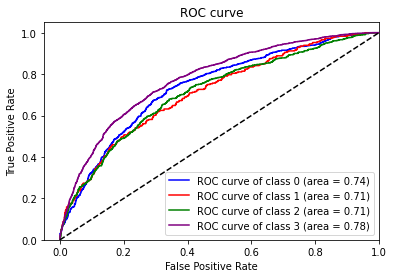

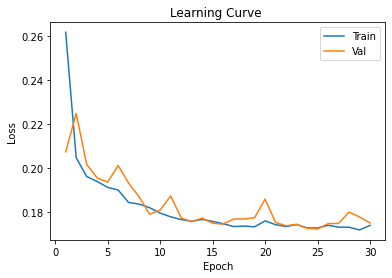

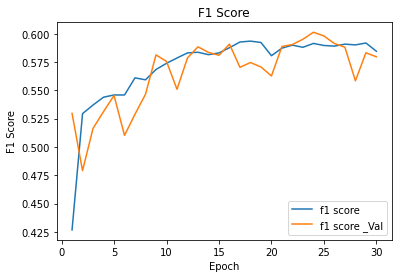

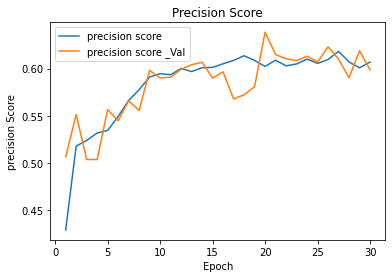

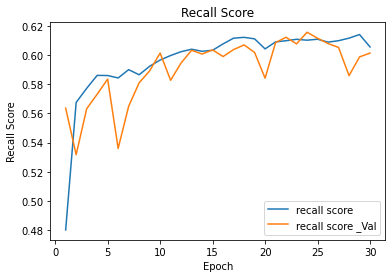

In [153]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin3 = nn.Linear(D_in, D_out)
    
    def forward(self, x):
        out = nn.functional.softmax(self.lin3(x),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 50
H2 = 50
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# GloVe 300D with 2 hidden 500 and 500 nodes

300
15976
Net(
  (lin1): Linear(in_features=300, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=500, bias=True)
  (lin3): Linear(in_features=500, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.2102262710928917 Validation loss = 0.20518128408326042
Training F1_score = 0.4314296569682174 Validation F1_score = 0.48376319245444993
Epoch 1:
Training loss = 0.20226529681682587 Validation loss = 0.20076327812340525
Training F1_score = 0.5047318063295245 Validation F1_score = 0.519221916595894
Epoch 2:
Training loss = 0.19872496807575227 Validation loss = 0.19815209011236826
Training F1_score = 0.5292662603388218 Validation F1_score = 0.5270570707311202
Epoch 3:
Training loss = 0.1959784011244774 Validation loss = 0.19584718926085365
Training F1_score = 0.5391589407558468 Validation F1_score = 0.5360666545120095
Epoch 4:
Training loss = 0.19365476423501968 Validation loss = 0.19379260680741733
Training F1_score = 0.5455957477117085 Validation F1_score = 0.

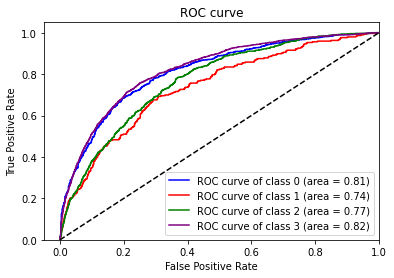

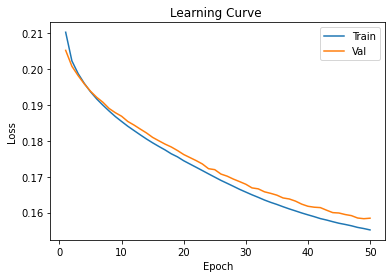

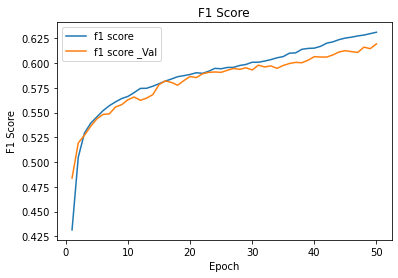

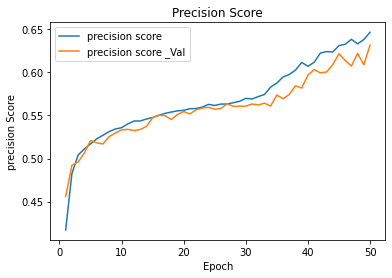

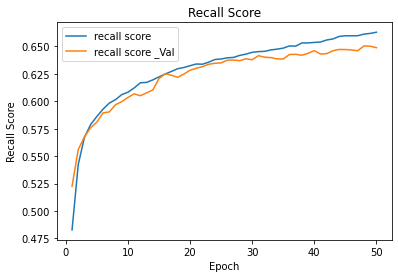

In [154]:
glove_to_pd = pd.read_csv('glove.6B.300d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,300])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, H2)
        self.lin3 = nn.Linear(H2, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.relu(self.lin2(out))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 500
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# GloVe 50D with Adam optimizer and 0.1 lr

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.35543588292598727 Validation loss = 0.35532407297028434
Training F1_score = 0.29921454601443864 Validation F1_score = 0.2990497300382643
Epoch 1:
Training loss = 0.3555416665673256 Validation loss = 0.355475638475683
Training F1_score = 0.2996897191572717 Validation F1_score = 0.29941121145735455
Epoch 2:
Training loss = 0.3554166674613953 Validation loss = 0.3544146820074982
Training F1_score = 0.2994045052662195 Validation F1_score = 0.30108901045378267
Epoch 3:
Training loss = 0.35536666643619536 Validation loss = 0.35532407297028434
Training F1_score = 0.2995520449288238 Validation F1_score = 0.29985400370567733
Epoch 4:
Training loss = 0.3553916667699814 Validation loss = 0.35562720398108166
Training F1_score = 0.2993963268258643 Validation F1_score = 0.2993377325934681
Epoch 5:
Training loss = 0.3553916666507721 Vali

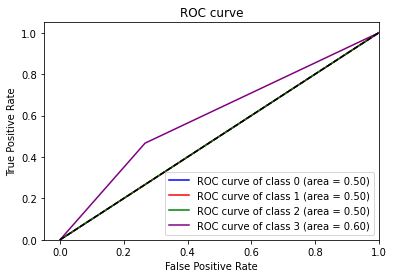

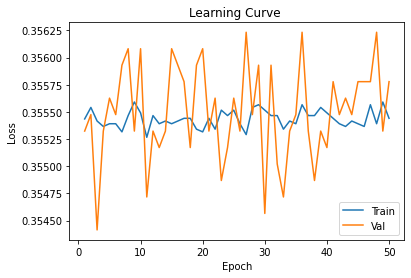

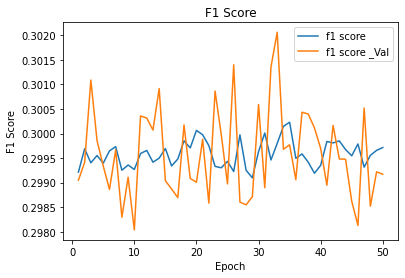

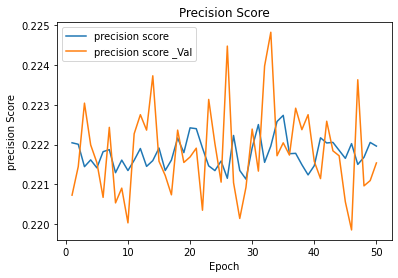

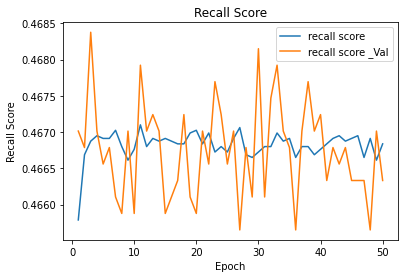

In [155]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.1

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# Adam and 0.01 lr

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.35535524088144305 Validation loss = 0.3556271998418702
Training F1_score = 0.2989580296458271 Validation F1_score = 0.299015689526944
Epoch 1:
Training loss = 0.35562771397829057 Validation loss = 0.35471779687537086
Training F1_score = 0.2997358253442876 Validation F1_score = 0.30068864217596036
Epoch 2:
Training loss = 0.35542713016271593 Validation loss = 0.35593027869860333
Training F1_score = 0.29948862756145955 Validation F1_score = 0.2988955841887261
Epoch 3:
Training loss = 0.3554590952992439 Validation loss = 0.35486937976545757
Training F1_score = 0.2996545005136831 Validation F1_score = 0.30023413506054514
Epoch 4:
Training loss = 0.3553788204193115 Validation loss = 0.355626679956913
Training F1_score = 0.29970877661739675 Validation F1_score = 0.2990970036456203
Epoch 5:
Training loss = 0.3553064839839935 Vali

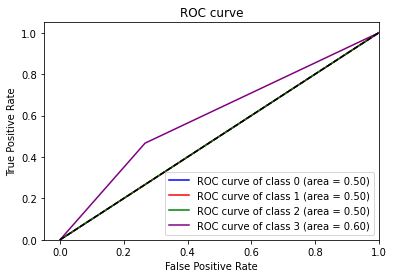

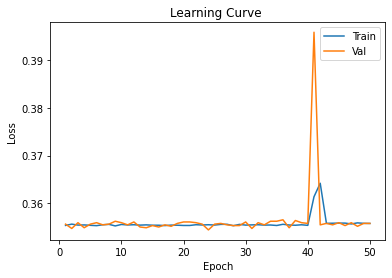

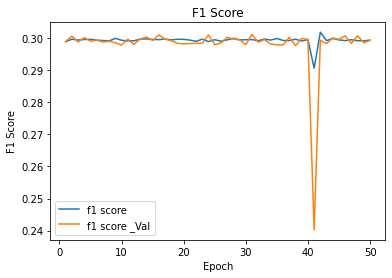

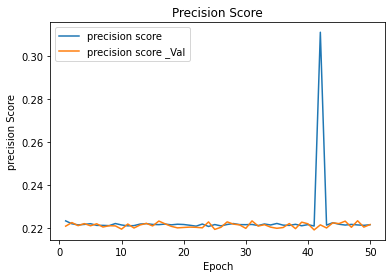

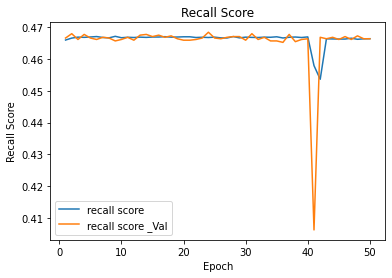

In [156]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.01

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# Adam with 0.0001 learning rate

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.20447651267051697 Validation loss = 0.18500957555241054
Training F1_score = 0.48515722173464193 Validation F1_score = 0.5583437341283601
Epoch 1:
Training loss = 0.1747382688522339 Validation loss = 0.17176873443855178
Training F1_score = 0.5776789851427523 Validation F1_score = 0.5626440486025778
Epoch 2:
Training loss = 0.16366018283367156 Validation loss = 0.16437995557983717
Training F1_score = 0.6045888548326029 Validation F1_score = 0.6014416057454882
Epoch 3:
Training loss = 0.15937680712342261 Validation loss = 0.16163156347142327
Training F1_score = 0.6205156281635045 Validation F1_score = 0.6245646056148983
Epoch 4:
Training loss = 0.15690583622455598 Validation loss = 0.1604398712515831
Training F1_score = 0.628164793557126 Validation F1_score = 0.6105667667552597
Epoch 5:
Training loss = 0.15508052361011504 Val

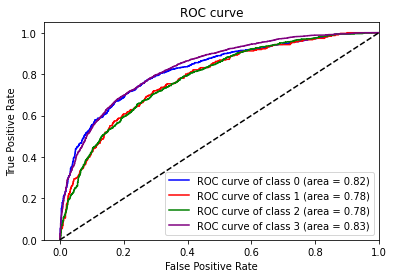

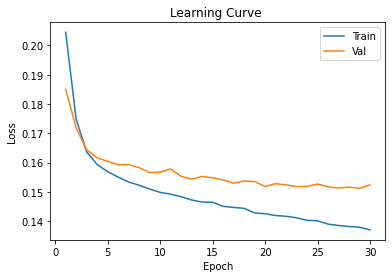

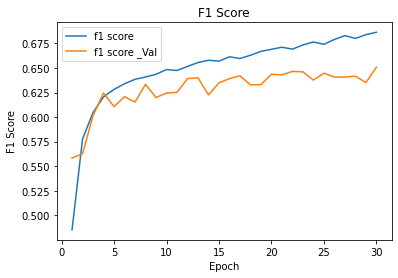

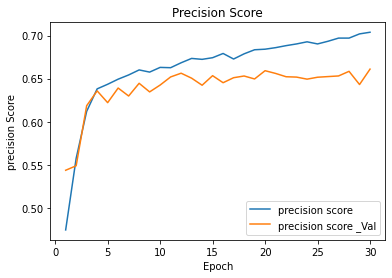

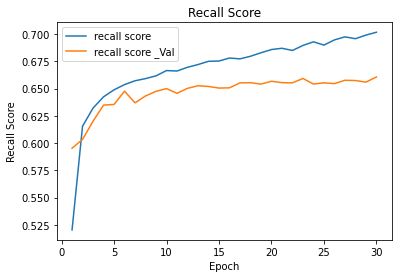

In [157]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# Cross entropy

50
15976
Net(
  (lin1): Linear(in_features=50, out_features=300, bias=True)
  (lin3): Linear(in_features=300, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.9808917362689972 Validation loss = 0.952383718556828
Training F1_score = 0.5011986743352098 Validation F1_score = 0.5575565633783214
Epoch 1:
Training loss = 0.9449913296699524 Validation loss = 0.9398784769905938
Training F1_score = 0.5545553888235747 Validation F1_score = 0.5618504484693863
Epoch 2:
Training loss = 0.9316635286808014 Validation loss = 0.9360724025302463
Training F1_score = 0.5669160527909375 Validation F1_score = 0.5662919020997863
Epoch 3:
Training loss = 0.9247447102069855 Validation loss = 0.9302789320548376
Training F1_score = 0.5759177465009536 Validation F1_score = 0.5681978789955717
Epoch 4:
Training loss = 0.9223739399909973 Validation loss = 0.92617510093583
Training F1_score = 0.5779080802350347 Validation F1_score = 0.5760193615928387
Epoch 5:
Training loss = 0.9198061225414276 Validation loss

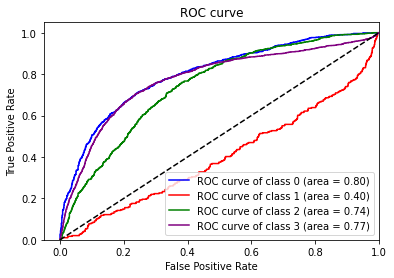

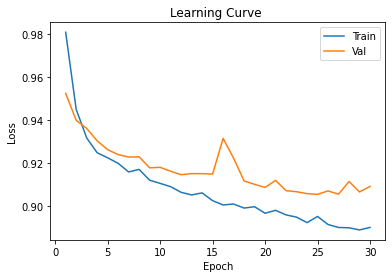

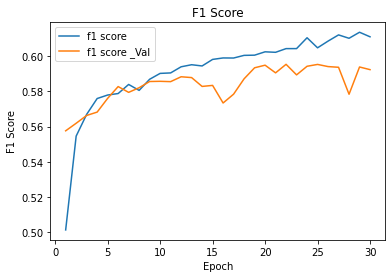

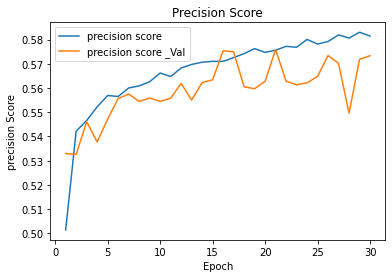

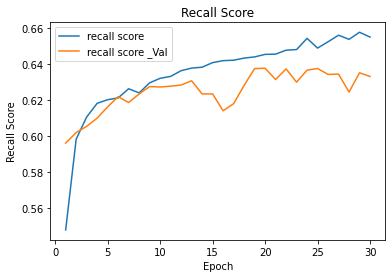

In [159]:
glove_to_pd = pd.read_csv('glove.6B.50d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,50])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 300
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(30):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

# FINAL MODEL with sgd, mse and 300D GloVe

300
15976
Net(
  (lin1): Linear(in_features=300, out_features=250, bias=True)
  (lin3): Linear(in_features=250, out_features=3, bias=True)
)
Epoch 0:
Training loss = 0.21484955888986587 Validation loss = 0.204812905854649
Training F1_score = 0.3994234742820549 Validation F1_score = 0.4420428198162776
Epoch 1:
Training loss = 0.20142633646726607 Validation loss = 0.20007979166176584
Training F1_score = 0.4720262055439832 Validation F1_score = 0.4693173655702034
Epoch 2:
Training loss = 0.196923910677433 Validation loss = 0.1962847233646446
Training F1_score = 0.497942556171511 Validation F1_score = 0.49481934903927666
Epoch 3:
Training loss = 0.1934106550216675 Validation loss = 0.19285292675097784
Training F1_score = 0.5181293814323549 Validation F1_score = 0.5134715690520052
Epoch 4:
Training loss = 0.19014225435256957 Validation loss = 0.18975381553173065
Training F1_score = 0.534609117903201 Validation F1_score = 0.5306882411877025
Epoch 5:
Training loss = 0.18746313118934632 Valida

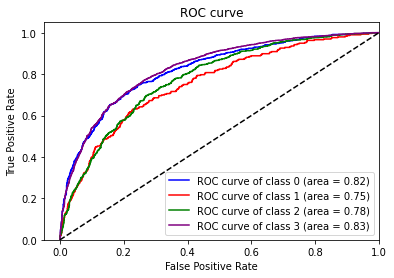

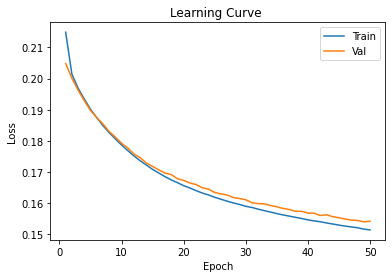

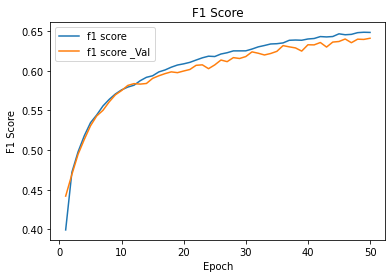

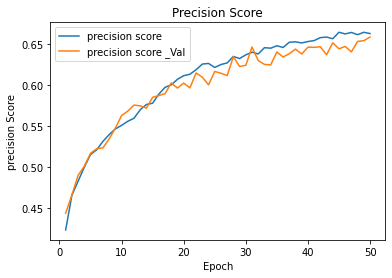

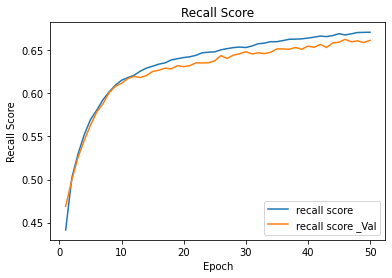

In [158]:
glove_to_pd = pd.read_csv('glove.6B.300d.txt', sep=" ", quoting=3, header=None, index_col=0)
dic_glove = {key: val.values for key, val in glove_to_pd.T.items()}


df = pd.read_csv("/content/vaccine_train_set.csv")
df_val = pd.read_csv("/content/vaccine_validation_set.csv")
#remove whitespaces
df['tweet'] = df['tweet'].str.strip()
df_val['tweet'] = df_val['tweet'].str.strip()
#Add prefix NOT_
df['tweet'] = df['tweet'].apply(lambda x:add_prefix_NOT_(x))
df_val['tweet'] = df_val['tweet'].apply(lambda x:add_prefix_NOT_(x))
# Remove links and url
df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df_val['tweet'] = df_val['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
#remove emojis and symbols
df['tweet']= df['tweet'].apply(lambda x:remove_emoji(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_emoji(x))
#remove punctuation
df['tweet']= df['tweet'].apply(lambda x:remove_punctuation(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:remove_punctuation(x))
#lower case
df['tweet']= df['tweet'].apply(lambda x: x.lower())
df_val['tweet']= df_val['tweet'].apply(lambda x: x.lower())
#replace accents
df['tweet']= df['tweet'].apply(lambda x:strip_accents(x))
df_val['tweet']= df_val['tweet'].apply(lambda x:strip_accents(x))
#remove numbers
df['tweet'] = df['tweet'].str.replace('\d+', '')
df_val['tweet'] = df_val['tweet'].str.replace('\d+', '')

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in dic_glove:
      ar = np.zeros([1,300])
    else:
      ar = np.array([dic_glove.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

df['tweet'] = df['tweet'].apply(lambda tweet:create_array(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:transform(tweet))
df['tweet'] = df['tweet'].apply(lambda tweet:sum_array(tweet))

df_val['tweet'] = df_val['tweet'].apply(lambda tweet:create_array(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:transform(tweet))
df_val['tweet'] = df_val['tweet'].apply(lambda tweet:sum_array(tweet))



Y = df['label']
Y_Val = df_val['label']

#-------TENSOR-------
y = torch.tensor(Y,dtype=torch.float)
y = y.to(torch.long)

x = torch.tensor(df['tweet'],dtype=torch.float)

y_Val = torch.tensor(Y_Val,dtype=torch.float)
y_Val = y_Val.to(torch.long)

x_Val = torch.tensor(df_val['tweet'],dtype=torch.float)

y = torch.nn.functional.one_hot(y,num_classes=3)
y = y.float()
y_Val = torch.nn.functional.one_hot(y_Val,num_classes=3)
y_Val = y_Val.float()
#-------NET MODEL-------

class Net(nn.Module):
    def __init__(self, D_in, H1 ,H2,H3, D_out):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(D_in, H1)
        self.lin3 = nn.Linear(H1, D_out)
    
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.softmax(self.lin3(out),dim=1)

        return out


#-------TRAIN-------

#Define layer sizes
D_in = x.shape[1] # 50
print(D_in)
print(x.shape[0])
H1 = 250
H2 = 500
H3 = 125
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum = 0.9,nesterov = False)


#Initialize dataloader
dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(x_Val, y_Val)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=64, shuffle=True)

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(50):
  batch_lo,batch_f1,batch_pre,batch_rec = [],[],[],[]
  val_batch_los,val_batch_f1,val_batch_pre,val_batch_rec = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_lo.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)


    f1 = f1_score(correct_y,output,average='weighted')
    batch_f1.append(f1)
    # print(y_batch.detach().numpy().shape, " ", output.shape)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    batch_rec.append(recall)
  # print(f"Epoch {epoch:3}: Loss = {sum(batch_lo)/len(dataloader):.5f}")
  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    val_batch_los.append(loss.item())

    output = torch.argmax(y_pred,dim = 1)
    correct_y = torch.argmax(y_batch,dim = 1)



    f1 = f1_score(correct_y,output,average='weighted')
    val_batch_f1.append(f1)

    precision = precision_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_pre.append(precision)

    recall = recall_score(correct_y,output,average='weighted',zero_division=0)
    val_batch_rec.append(recall)
  
  n_epoch+=1
  iters.append(n_epoch)
  losses.append(sum(batch_lo)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(val_batch_los)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1)/len(dataloader))
  f1_train_scores_Val.append(sum(val_batch_f1)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_pre)/len(dataloader))
  precision_train_scores_Val.append(sum(val_batch_pre)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_rec)/len(dataloader))
  recall_train_scores_Val.append(sum(val_batch_rec)/len(dataloader_Val))

  print(f"Epoch {epoch}:")
  print(f"Training loss = {sum(batch_lo)/len(dataloader)} Validation loss = {sum(val_batch_los)/len(dataloader_Val)}")
  print(f"Training F1_score = {sum(batch_f1)/len(dataloader)} Validation F1_score = {sum(val_batch_f1)/len(dataloader_Val)}")

fpr = [0,0,0,0]
tpr = [0,0,0,0]
t = [0,0,0,0]
roc_auc = [0,0,0,0]
y_pred_val = model(x_Val)


for i in range(3):
  fpr[i] , tpr[i], t[i] = roc_curve(y_Val.detach().numpy()[:,i],y_pred_val.detach().numpy()[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
fpr[3] , tpr[3], t[3] = roc_curve(y_Val.detach().numpy().ravel(),y_pred_val.detach().numpy().ravel())
roc_auc[3] = auc(fpr[3], tpr[3])

colors = cycle(['blue', 'red', 'green','purple'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve ")
plt.plot(iters, losses, label="Train")
plt.plot(iters, losses_Val, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="f1 score")
plt.plot(iters, f1_train_scores_Val, label="f1 score _Val")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="precision score")
plt.plot(iters, precision_train_scores_Val, label="precision score _Val")
plt.xlabel("Epoch")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="recall score")
plt.plot(iters, recall_train_scores_Val, label="recall score _Val")
plt.xlabel("Epoch")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()